In [1]:
#import os
#import sys
#import glob
import numpy as np
#import pandas as pd
#import operator as op
#import itertools as it
import scipy.linalg as la
#from pandas import DataFrame, Series
#from functools import reduce, partial
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

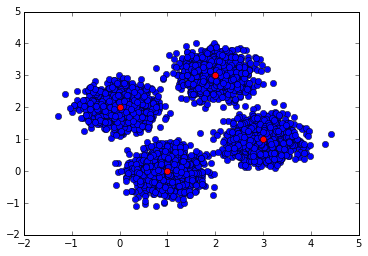

In [13]:
#### Make test dataset ####
n_cl = 4 # Number of clusters (truth)
n_pt = 1024 # Number of points per cluster
centers = np.column_stack((np.arange(n_cl), np.random.permutation(n_cl)))
pts = np.row_stack([c + np.random.normal(0.0, 1/np.sqrt(8), (n_pt, 2)) for c in centers])
plt.plot(pts[:,0], pts[:,1], 'bo',
        centers[:,0], centers[:,1], 'ro')
plt.show()

In [14]:
#### Make scaled affinity matrix ####
sigma = 0.5  # Bandwidth of affinity measure
A0 = np.sum((pts[None, :] - pts[:, None])**2, -1)  # Squared distance matrix
A = np.exp(-A0 / (2 * sigma))
np.fill_diagonal(A, 0)  # Affinity matrix
D12 = np.diag(1 / np.sqrt(np.sum(A, 1)))  # Sums^(-1/2) for scaling
L = np.dot(np.dot(D12, A), D12)  # Scaled affinity matrix

In [15]:
#### Find & scale k largest eigenvectors ####
k = n_cl  # Number of clusters to find
n = len(pts)  # Number of points in dataset
X = la.eigh(L, eigvals=(n-k, n-1))[1][:, ::-1]  # k largest eigenvectors
X1 = la.norm(X, axis=1)[:, None]  # Row norms for scaling
Y = X / X1  # Scaled matrix of eigenvectors

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


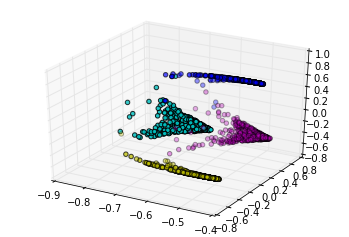

In [16]:
#### Plot first 3 dimensions to see transformed clusters ####
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, xs=Y[:,0], ys=Y[:, 1], zs=Y[:,2],
               c='c'*n_pt+'y'*n_pt+'b'*n_pt+'m'*n_pt)#+'g'*n_pt+'r'*n_pt)